In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_main = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\4042403721.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data_main = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')


In [3]:
data_main.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [4]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [5]:
data_main.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [6]:
print("Total rows in the dataset : {}".format(data_main.shape[0]))
print("Total columns in the dataset : {}".format(data_main.shape[1]))

Total rows in the dataset : 1000
Total columns in the dataset : 23


In [7]:
data_main.drop(columns=["Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"],inplace=True)

In [8]:
print("Total columns after drop in the dataset : {}".format(data_main.shape[1]))

Total columns after drop in the dataset : 18


In [9]:
missing_nan_columns=["last_name","job_title","job_industry_category"]

In [10]:
def nan_to_missing(missing_nan_columns):
    for i in missing_nan_columns:
        data_main[i].fillna("Missing",inplace=True)
        print(data_main[i].isnull().sum())
nan_to_missing(missing_nan_columns)

0
0
0


In [11]:
data_main.isnull().sum()

first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Rank                                    0
Value                                   0
dtype: int64

In [12]:
data_main_index_drop=data_main[data_main["DOB"].isnull()].index

In [13]:
data_main.drop(data_main_index_drop,inplace=True)

In [14]:
data_main.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [16]:
from datetime import date
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

data_main['Age'] = data_main['DOB'].apply(age)

In [17]:
data_main['Age'].describe().transpose()

count    983.000000
mean      52.358087
std       17.058243
min       21.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: Age, dtype: float64

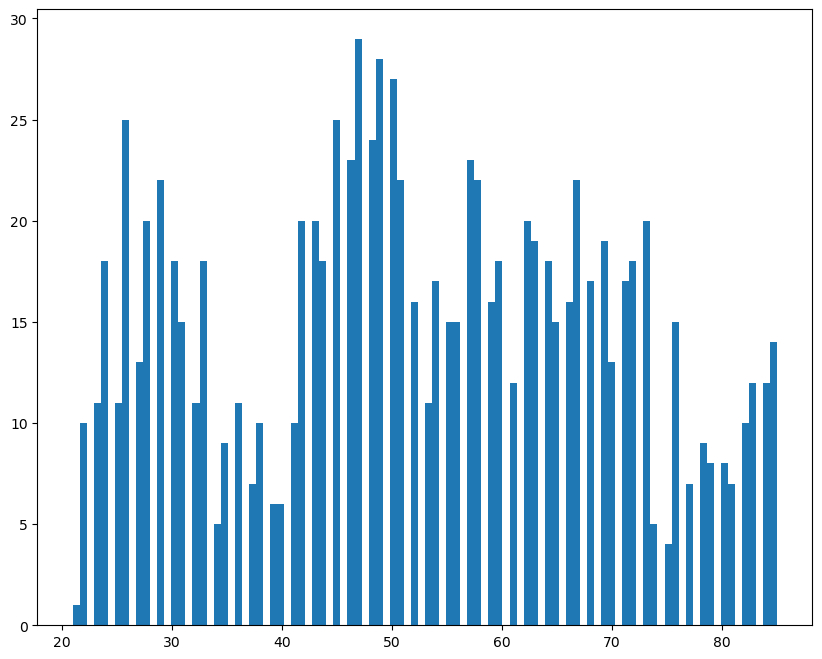

In [18]:
plt.figure(figsize=(10,8))
plt.hist(data_main['Age'],bins=100)
plt.show()

In [57]:
data_main['age_group'] = pd.cut(data_main['Age'],
                             bins=[18,25,40,55,90],labels=["18-25","25-40","40-55","55-90"],
                             include_lowest=True)

In [58]:
data_main['age_group'].value_counts()

55-90    431
40-55    305
25-40    196
18-25     51
Name: age_group, dtype: int64

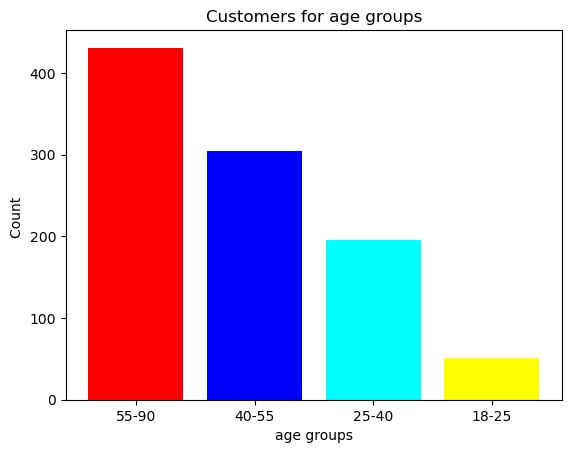

In [59]:
plt.bar(data_main['age_group'].value_counts().index,data_main['age_group'].value_counts(),color=["red","blue","cyan","yellow"])
plt.xlabel("age groups")
plt.ylabel("Count ")
plt.title("Customers for age groups")
plt.show()

In [60]:
data_main['Age'].describe()

count    983.000000
mean      52.358087
std       17.058243
min       21.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: Age, dtype: float64

In [61]:
data_main[data_main['Age']==data_main['Age'].max()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,age_group
18,Odilia,Quick,Female,65,1938-11-09,General Manager,Manufacturing,Affluent Customer,N,Yes,11,1550 Russell Way,2222,NSW,Australia,11,19,1.531250,85,55-90
176,Devonne,Alderwick,Female,79,1939-01-29,Research Associate,Missing,High Net Worth,N,Yes,9,534 Lien Lane,3122,VIC,Australia,7,177,1.162500,85,55-90
191,Franklin,Wohler,Male,55,1938-10-16,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,NSW,Australia,8,191,1.150000,85,55-90
265,Alleen,Eaken,Female,56,1938-08-31,Missing,Missing,Mass Customer,N,No,10,343 Lakewood Center,2089,NSW,Australia,12,259,1.062500,85,55-90
406,Kippar,Brimilcome,Male,21,1938-11-29,Graphic Designer,Health,Mass Customer,N,No,19,082 Welch Lane,2089,NSW,Australia,11,405,0.930000,85,55-90
414,Wyn,Meach,Male,37,1938-09-10,Missing,Manufacturing,Mass Customer,N,No,9,79 Armistice Junction,2765,NSW,Australia,9,415,0.921875,85,55-90
585,Letizia,Poore,Female,27,1938-08-30,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,583,0.787500,85,55-90
689,Willard,Booton,Male,69,1938-09-02,Missing,Health,High Net Worth,N,Yes,7,05 Ronald Regan Alley,2121,NSW,Australia,9,688,0.697000,85,55-90
769,Andrea,Pendle,Female,86,1938-08-05,Missing,Missing,High Net Worth,N,Yes,13,31281 Meadow Valley Way,4500,QLD,Australia,6,760,0.637500,85,55-90
797,Anthony,Morison,Male,7,1938-06-08,General Manager,Health,Mass Customer,N,No,12,276 Derek Circle,2759,NSW,Australia,9,797,0.600000,85,55-90


In [62]:
data_main[data_main['Age']==data_main['Age'].max()].shape[0]

14

In [64]:
data_main["tenure"].value_counts()

9     79
13    73
11    66
10    63
12    60
7     59
17    59
5     57
15    57
8     55
14    52
16    49
6     45
18    36
4     35
19    34
3     25
21    24
20    22
2     13
22    12
1      8
Name: tenure, dtype: int64

In [66]:
data_main['job_title'].value_counts()

Missing                  105
Software Consultant       14
Environmental Tech        14
Associate Professor       14
Chief Design Engineer     13
                        ... 
Web Developer II           1
Statistician III           1
Programmer Analyst IV      1
Engineer II                1
Web Developer I            1
Name: job_title, Length: 185, dtype: int64

In [67]:
data_main['job_industry_category'].value_counts()

Financial Services    202
Manufacturing         199
Missing               165
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [68]:
data_main['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

In [69]:
data_main['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

In [70]:
data_main['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

In [71]:
data_main['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

In [100]:
pie_columns=["gender","tenure",'wealth_segment','deceased_indicator','owns_car','age_group','state']

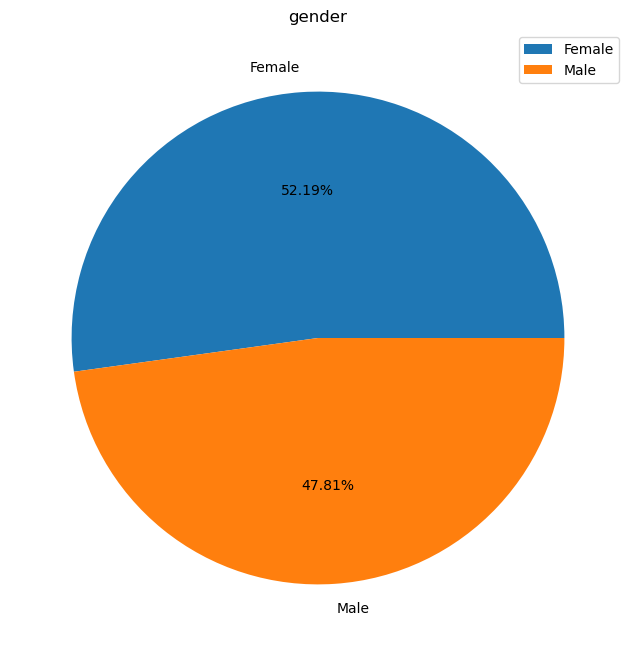

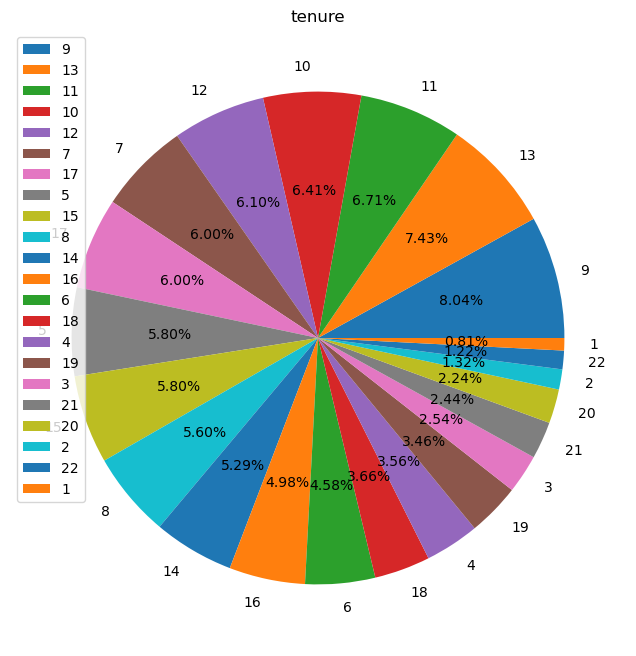

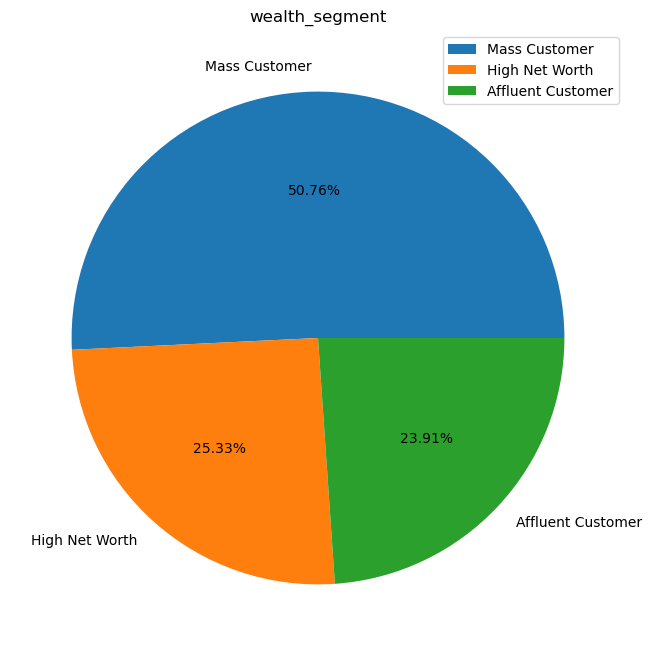

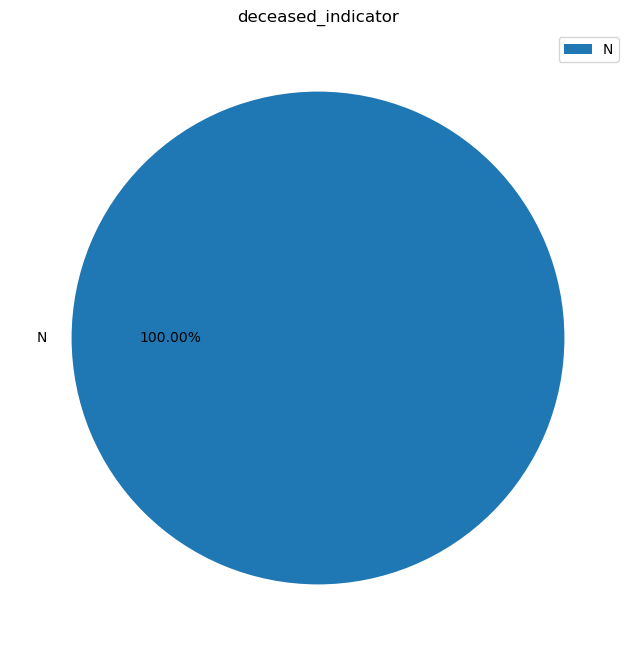

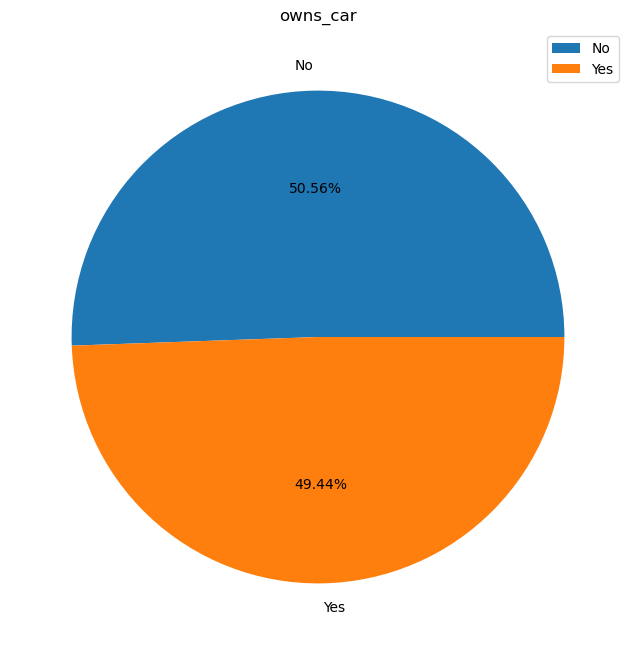

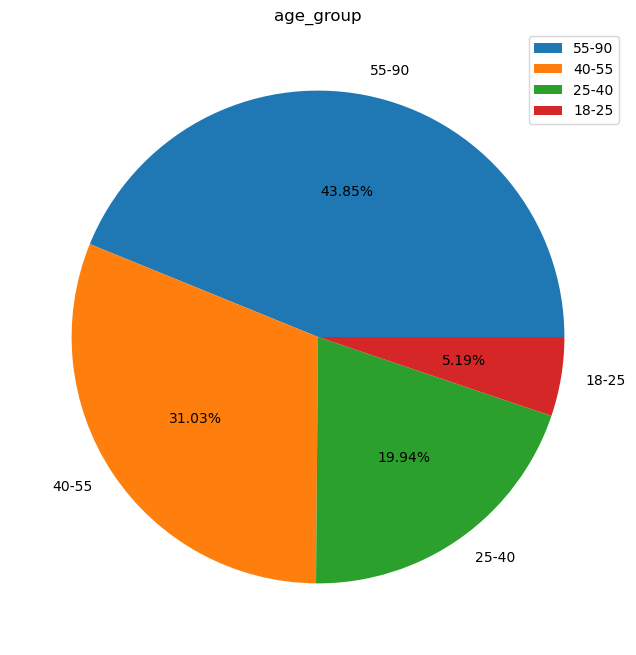

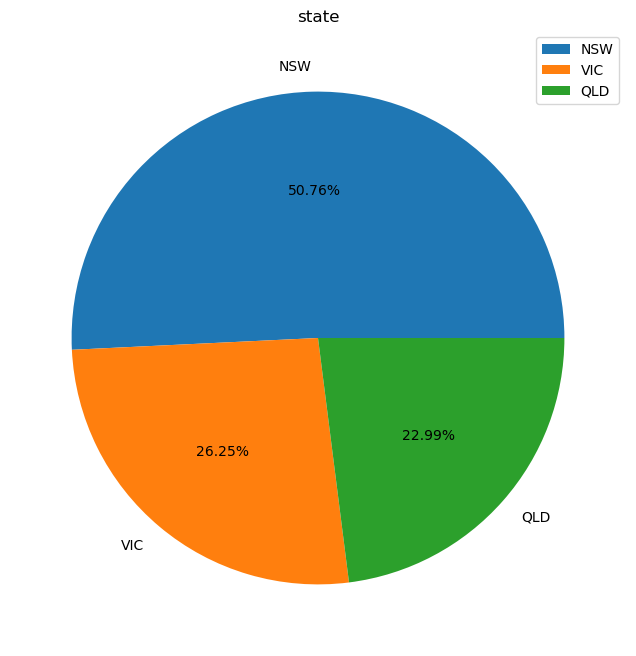

In [109]:
for i in pie_columns:
    plt.figure(figsize=(10,8))
    plt.pie(data_main[i].value_counts(),labels=data_main[i].value_counts().index,autopct='%1.2f%%')
    plt.title(pie_columns[pie_columns.index(i)])
    plt.legend()
    plt.show()

In [110]:
data_main.to_csv('CustomerDemographic_Cleaned.csv', index=False)